In [1]:
import numpy as np

from fpcross import ij, Grid, Solver, Model, Check

ij()

Start | 11:44AM MSK on Nov 12, 2019 | python 3.7.1    |
-------------------------------------------------------


In [2]:
MD = Model.select('fpe_1d_oup')
MD.init(s=1., D=0.5, A=1.).info()

<div class="head0"><div class="head0__name">fpe-1d-oup</div><div class="head0__note">One-dimensional Focker Planck equation (Ornstein–Uhlenbeck process) [FPE, 1D, analytic, analytic-stationary, OUP].</div></div><div class="head2">
                <div class="head2__name">Parameters</div>
                <div class="head2__note"><ul><li>s =   1.0000 [Initial variance]<div>Variance of the initial condition (type: float, default:   1.0000)</div></li><li>D =   0.5000 [Diffusion coefficient]<div>Scalar diffusion coefficient (type: float, default:   0.5000)</div></li><li>A =   1.0000 [Drift]<div>Constant drift coefficient (type: float, default:   1.0000)</div></li></ul></div>
            </div><div class="head1">
                <div class="head1__name">Description</div>
            </div>
Consider
$$
    d x = f(x, t) \, dt + S(x, t) \, d \beta,
    \quad
    d \beta \, d \beta^{\top} = Q(t) dt,
    \quad
    x(0) = x_0 \sim \rho(x, 0) = \rho_0 (x),
$$
$$
    \frac{\partial \rho(x, t)}{\partial t} =
        \sum_{i=1}^d \sum_{j=1}^d
            \frac{\partial^2}{\partial x_i \partial x_j}
            \left[ D_{ij}(x, t) \rho(x, t) \right]
        - \sum_{i=1}^d
            \frac{\partial}{\partial x_i}
            \left[ f_i(x, t) \rho(x, t) \right],
    \quad
     D(x, t) = \frac{1}{2} S(x, t) Q(t) S(x, t)^{\top},
$$
where spatial $d$-dimensional ($d \ge 1$) variable $x \in R^d$ has probability density function (PDF) $\rho(x, t)$, $\beta$ is Brownian motion of dimension $q$ ($q \ge 1$, and we assume below that $q = d$), $f(x, t) \in R^d$ is a vector-function, $S(x, t) \in R^{d \times q}$ and $Q(t) \in R^{q \times q}$ are matrix-functions and $D(x, t) \in R^{d \times d}$ is a diffusion tensor.

Let
$$
    Q(t) \equiv I,
    \,
    S(x, t) \equiv \sqrt{2 D_c} I
    \implies
    D(x, t) \equiv D_c I,
$$
and
$$
    d = 1,
    \quad
    x \in \Omega,
    \quad
    \rho(x, t) |_{\partial \Omega} \approx 0,
    \quad
    f(x, t) = A (\mu - x),
    \quad
    \mu \equiv 0,
    \quad
    \rho_0(x) = \frac{1}{\sqrt{2 \pi s}}\exp{\left[-\frac{x^2}{2s}\right]}.
$$

This equation has exact solution for the $d$-dimensional case ([see this paper](https://advancesindifferenceequations.springeropen.com/articles/10.1186/s13662-019-2214-1))
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{1}{2} (x - M(t, x_0))^T \Sigma^{-1}(t) (x - M(t, x_0))
        \right],
$$
where $x_0$ is an initial condition and
$$
    M(t, x_0) = e^{-A t} x_0 + \left( I - e^{-A t} \right) \mu,
$$
$$
    \Sigma(t) = \int_0^t e^{A (s-t)} S S^T e^{A^T (s-t)} \, d  s,
$$
or in a more simple form for the case $d=1$
$$
    \rho(x, t, x_0) =
        \frac{1}{\sqrt{ | 2 \pi \Sigma(t) | }}
        exp \left[
            -\frac{(x - M(t, x_0))^2}{2 \Sigma(t)}
        \right],
    \quad
    M(t, x_0) = e^{-A t} x_0,
    \quad
    \Sigma(t) = \frac{1 - e^{-2 A t}}{2 A}.
$$

We can rewrite the solution $\rho(x, t, x_0)$ in terms of the initial PDF $\rho_0(x)$ as
$$
    \rho(x, t) = \int_{-\infty}^{\infty}
        \rho(x, t, x_0) \rho_0(x_0) \, d x_0,
$$
which after accurate computations leads to the following analytic solution
$$
    \rho(x, t) =
        \frac
            {
                1
            }
            {
                \sqrt{2 \pi \left( \Sigma(t) + s e^{-2 A t} \right)}
            }
        \exp{\left[
            - \frac
                {
                    x^2
                }
                {
                    2 \left( \Sigma(t) + s e^{-2 A t} \right)
                }
        \right]},
$$
and the stationary solution ($t \rightarrow \infty$) is
$$
    \rho_{stat}(x) =
        \sqrt{
            \frac{A}{\pi}
        }
        e^{-A x^2}.
$$
        <div class="note">The Ornstein–Uhlenbeck process is mean-reverting (the solution tends to its long-term mean $\mu$ as time $t$ tends to infinity) if $A > 0$ and this process at any time is a normal random variable.</div><div class="end"></div>

In [4]:
TG = Grid(d=1, n=1000, l=[+0., +8.], k='u')
SG = Grid(d=1, n= 101, l=[-6., +6.], k='c')
SL = Solver(TG, SG, MD)
SL.init(n_hst=4, with_norm_int=False, with_r_hst=False)
SL.prep()
SL.calc()
SL.info()

Solve: 100%|█| 999/999 [00:05<00:00, 191.43step/s, | At T=8.0e+00 :                                                                                                       Int=1.0e+00  Erhs=1.9e-05  Ereal=9.3e-06  Estat=9.3e-06]

------------------ Solver
Format    : 1D, NP [order=2]
Format    : 1D, Hst pois  : 4 
Hst r     : No 
Norm int  : No 
Err  rhs  : 1.87e-05
Err  real : 9.28e-06
Err  stat : 9.33e-06
Time prep : 1.75e-02 
Time calc : 5.22e+00 
...  init : 2.25e-04 
...  diff : 7.94e-02 
...  conv : 5.07e+00 
...  post : 3.50e-03 
...  last : 2.86e-04 


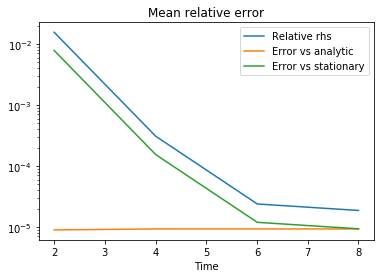

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc

from fpcross import config

tm = SL.hst['T']
er = SL.hst['E_real']
es = SL.hst['E_stat']

plt.title('Mean relative error')
plt.xlabel('Time')
plt.plot(tm, SL.hst['E_rhsn'], label='Relative rhs')
plt.plot(tm, SL.hst['E_real'], label='Error vs analytic')
plt.plot(tm, SL.hst['E_stat'], label='Error vs stationary')
plt.legend(loc='best')
plt.semilogy()
plt.show()

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_t(-3.0, opts)
SL.plot_t(+0.0, opts)
SL.plot_t(+3.0, opts)

In [ ]:
opts = { 'is_log': True, 'is_abs': False, 'is_err_abs': False, 'with_err_stat': True }
SL.plot_x(+0.1, opts)
SL.plot_x(+2.5, opts)
SL.plot_x(None, opts)

<div class="head1">
    <div class="head1__name">
        Results for multiple computations
    </div>
    <div class="head1__note">
        We use results that already saved to file (see computation code at the end of this file).
    </div>
</div>

In [3]:
CH = Check('./data/fpe_1d_oup')
CH.load()

name1 = 'Solver (ord=1)'
name2 = 'Solver (ord=2)'

M = CH.res[name2]['M']
N = CH.res[name2]['N']

m = M[-1]
n = N[-1]

<div class="head2">
    <div class="head2__name">
        Dependence on the number of time points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

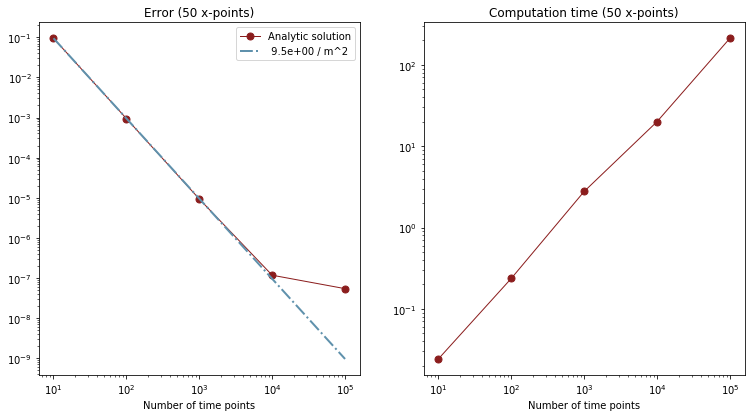

In [4]:
CH.plot(name2, n=n, is_stat=False, lims={ 'all': [0, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the number of spatial points
    </div>
    <div class="head2__note">
        We present results for NP-solver of the 2th order.
    </div>
</div>

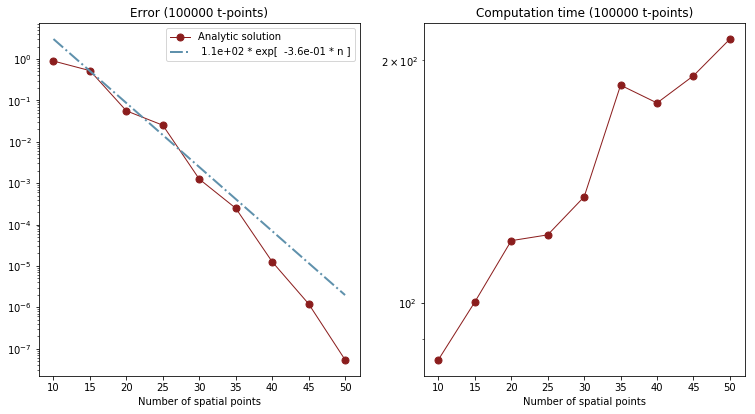

In [10]:
CH.plot(name2, m=m, is_stat=False, lims={ 'all': [1, None] })

<div class="head2">
    <div class="head2__name">
        Dependence on the solver order
    </div>
    <div class="head2__note">
        We present results (dependencies on the number of time and spatial points) for NP-solvers of various orders.
    </div>
</div>

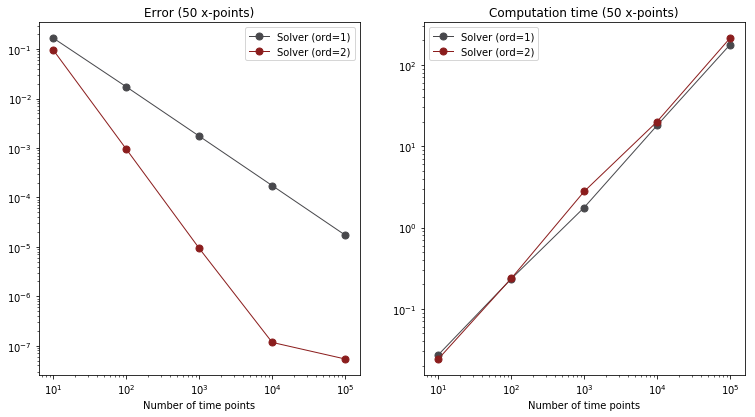

In [11]:
CH.plot_all(n=n, is_stat=False)

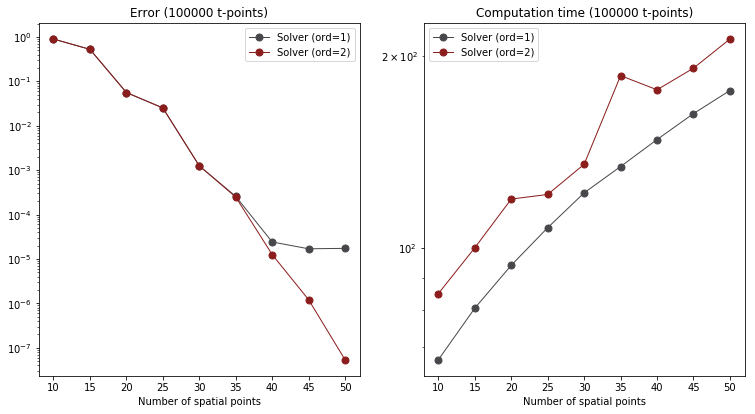

In [12]:
CH.plot_all(m=m, is_stat=False)

<div class="head1">
    <div class="head1__name">
        Explicit (simple) solvers | DRAFT !!!
    </div>
    <div class="head1__note">
        Only for example and tests.
    </div>
</div>

In [13]:
import time
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

from intertrain import Intertrain

In [14]:
d = 1
m = t_poi
n = x_poi
l = (x_max - x_min) / (x_poi - 1)
h = (t_max - t_min) / (t_poi - 1)
T = np.linspace(t_min, t_max, t_poi)

In [15]:
def show_x(X, r_calc, _time):
    X = X.reshape(1, -1)
    r_init = func_r0(X)
    r_real = func_rt(X, t_max)
    r_stat = func_rs(X)
    e = np.linalg.norm(r_real - r_calc) / np.linalg.norm(r_real)

    print('Number of spatial points : %8d'%x_poi)
    print('Number of time points    : %8d'%t_poi)
    print('Error (relative norm)    : %-12.2e'%e)
    print('Total time (sec)         : %-12.2e'%_time)
    print()
    
    plt.plot(
        X.reshape(-1), r_init, '--', label='Initial',
        linewidth=3, color='tab:blue'
    )
    plt.plot(
        X.reshape(-1), r_calc, label='Calculated',
        linewidth=1, color='tab:green', marker='o', markersize=7,
        markerfacecolor='lightgreen', markeredgecolor='g'
    )
    plt.plot(
        X.reshape(-1), r_real, label='Analytic',
        linewidth=3, color='black'
    )
    plt.plot(
        X.reshape(-1), r_stat, '--', label='Stationary',
        linewidth=2, color='magenta'
    )
    
    plt.title('Solution at the final time step')
    plt.xlabel('x')
    plt.ylabel('r')
    plt.legend(loc='best')
    plt.semilogy()
    plt.show()

<div class="head2">
    <div class="head2__name">
        Uniform spatial grid and the 1st order splitting
    </div>
</div>

We can solve equation on the uniform spatial grid for the time $t > 0$ with step $h$ and uniform spatial grid with step $l$ using 2th order finite difference scheme

$$
    \frac{\partial \rho}{\partial t} = (D + \widehat{Q}) \rho,
$$
where
$$
    \widehat{Q} \rho = f Q \rho - \frac{\partial f}{\partial x} \rho,
$$

$$
    D = \frac{D_{coef}}{l^2} tridiag \left( 1, -2, 1 \right),
    \quad
    Q = \frac{1}{2 l} tridiag \left( -1, 0, 1 \right).
$$

Let apply the 1th order splitting method on the time step $(k+1)$
$$
    \frac{\partial v}{\partial t} = D v,
    \quad
    v_{k} = \rho_{k},
    \quad
    v_{k+1} = v = ?,
$$
$$
    \frac{\partial w}{\partial t} = \widehat{Q} w,
    \quad
    w_{k} = v,
    \quad
    w_{k+1} = \rho_{k+1} = ?,
$$
and solve both ODEs by the 1th order Euler method.

Number of spatial points :      101
Number of time points    :     1000
Error (relative norm)    : 6.92e-03    
Total time (sec)         : 1.38e-01    



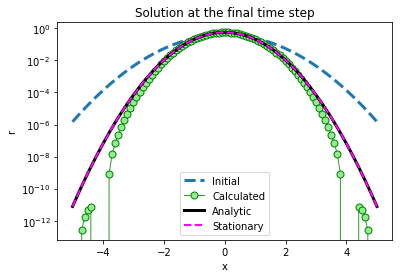

In [16]:
_time = time.time()

X = np.linspace(x_min, x_max, x_poi).reshape(1, -1)

Q = sp.spdiags([
        [-1.] * n,
        [+1.] * n
    ], [-1,  1], n, n).tocsr().toarray()
Q = Q * (0.5 / l)

D = sp.spdiags([
        [+1.] * x_poi,
        [-2.] * x_poi,
        [+1.] * x_poi
    ], [-1, 0, 1], x_poi, x_poi
).tocsr().toarray()
D = D * D_coef / l / l

J = np.eye(n); J[0, 0] = 0.; J[-1, -1] = 0.
ZD = h * D
ZQ = h * Q

r = func_r0(X)
r = r.reshape(-1, 1)
for t in T[1:]:
    F0 = np.diag(func_f0(X, t).reshape(-1))
    F1 = np.diag(func_f1(X, t).reshape(-1))
    v1 = r + ZD @ r
    w1 = v1 - F0 @ ZQ @ v1 - h * F1 @ v1
    r = w1

show_x(X, r.reshape(-1), time.time() - _time)

<div class="head1">
    <div class="head1__name">
        Multiple computations
    </div>
    <div class="head1__note">
        We compute dependencies of solution accuracy and calculation time on the number of time and spacial points and solver type. Results are saved to file and may be reused later for visualization.  
    </div>
</div>

In [2]:
MD = Model.select('fpe_1d_oup').init(s=1., D=0.5, A=1.)
MD.info(is_comp=True)
    
CH = Check('./data/fpe_1d_oup')
CH.set_md(MD)
CH.set_tm_lim(+0., +8.)
CH.set_sp_lim(-6., +6.)

M = [10, 100, 1000, 10000, 100000]
N = np.arange(10, 51, 5)
CH.add(name='Solver (ord=1)', eps=1.E-6, ord=1, with_tt=False, M=M, N=N)

M = [10, 100, 1000, 10000, 100000]
N = np.arange(10, 51, 5)
CH.add(name='Solver (ord=2)', eps=1.E-6, ord=2, with_tt=False, M=M, N=N)

if False: # Accidental start protection
    CH.calc()
    CH.save()

Model : fpe-1d-oup             | d r(x,t) / d t = D d^2 r(x,t) / d x^2 + A d (x r(x,t)) / d x
>>>>>>> Description            : One-dimensional Focker Planck equation (Ornstein–Uhlenbeck process)
----- Calc for solver | "Solver (ord=1)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 168.63step/s, | At T=8.0e+00 : er=2.7e-01 es=2.7e-01]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 202.13step/s, | At T=8.0e+00 : er=2.9e-01 es=2.9e-01]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 221.87step/s, | At T=8.0e+00 : er=1.1e-01 es=1.1e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 215.43step/s, | At T=8.0e+00 : er=1.8e-01 es=1.8e-01]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 209.99step/s, | At T=8.0e+00 : er=1.7e-01 es=1.7e-01]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 183.49step/s, | At T=8.0e+00 : er=1.7e-01 es=1.7e-01]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 180.30step/s, | At T=8.0e+00 : er=1.7e-01 es=1.7e-01]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 167.07step/s, | At T=8.0e+00 : er=1.7e-01 es=1.7e-01]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 180.96step/s, | At T=8.0e+00 : er=1.7e-01 es=1.7e-01]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 763.31step/s, | At T=8.0e+00 : er=3.1e-01 es=3.1e-01]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 651.95step/s, | At T=8.0e+00 : er=3.5e-01 es=3.5e-01]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 597.82step/s, | At T=8.0e+00 : er=5.2e-02 es=5.2e-02]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 601.75step/s, | At T=8.0e+00 : er=2.7e-02 es=2.7e-02]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 545.48step/s, | At T=8.0e+00 : er=1.7e-02 es=1.7e-02]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 458.50step/s, | At T=8.0e+00 : er=1.7e-02 es=1.7e-02]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 435.13step/s, | At T=8.0e+00 : er=1.7e-02 es=1.7e-02]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 413.40step/s, | At T=8.0e+00 : er=1.7e-02 es=1.7e-02]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 390.81step/s, | At T=8.0e+00 : er=1.7e-02 es=1.7e-02]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1341.41step/s, | At T=8.0e+00 : er=6.6e-01 es=6.6e-01]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:00<00:00, 1141.07step/s, | At T=8.0e+00 : er=3.0e-01 es=3.0e-01]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:01<00:00, 984.75step/s, | At T=8.0e+00 : er=6.5e-02 es=6.5e-02]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:01<00:00, 869.40step/s, | At T=8.0e+00 : er=2.5e-02 es=2.5e-02]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 793.62step/s, | At T=8.0e+00 : er=1.9e-03 es=1.9e-03]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 715.93step/s, | At T=8.0e+00 : er=1.8e-03 es=1.8e-03]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:01<00:00, 660.45step/s, | At T=8.0e+00 : er=1.7e-03 es=1.7e-03]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 592.08step/s, | At T=8.0e+00 : er=1.7e-03 es=1.7e-03]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:01<00:00, 556.76step/s, | At T=8.0e+00 : er=1.7e-03 es=1.7e-03]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:06<00:00, 1468.50step/s, | At T=8.0e+00 : er=8.7e-01 es=8.7e-01]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:08<00:00, 1182.35step/s, | At T=8.0e+00 : er=4.3e-01 es=4.3e-01]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1024.29step/s, | At T=8.0e+00 : er=5.7e-02 es=5.7e-02]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:11<00:00, 907.30step/s, | At T=8.0e+00 : er=2.5e-02 es=2.5e-02]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:12<00:00, 798.46step/s, | At T=8.0e+00 : er=1.2e-03 es=1.2e-03]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:13<00:00, 719.46step/s, | At T=8.0e+00 : er=3.6e-04 es=3.6e-04]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:16<00:00, 602.05step/s, | At T=8.0e+00 : er=1.8e-04 es=1.8e-04]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:18<00:00, 551.32step/s, | At T=8.0e+00 : er=1.7e-04 es=1.7e-04]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:18<00:00, 550.02step/s, | At T=8.0e+00 : er=1.7e-04 es=1.7e-04]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [01:07<00:00, 1475.85step/s, | At T=8.0e+00 : er=8.9e-01 es=8.9e-01]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:21<00:00, 1225.94step/s, | At T=8.0e+00 : er=5.2e-01 es=5.2e-01]


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [01:35<00:00, 1050.95step/s, | At T=8.0e+00 : er=5.6e-02 es=5.6e-02]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [01:48<00:00, 927.19step/s, | At T=8.0e+00 : er=2.5e-02 es=2.5e-02]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [02:03<00:00, 810.16step/s, | At T=8.0e+00 : er=1.2e-03 es=1.2e-03]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [02:15<00:00, 736.78step/s, | At T=8.0e+00 : er=2.6e-04 es=2.6e-04]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:29<00:00, 668.82step/s, | At T=8.0e+00 : er=2.4e-05 es=2.4e-05]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [02:44<00:00, 609.22step/s, | At T=8.0e+00 : er=1.7e-05 es=1.7e-05]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [02:58<00:00, 560.63step/s, | At T=8.0e+00 : er=1.7e-05 es=1.7e-05]


----- Done            | Time : 1.28e+03 sec
----- Calc for solver | "Solver (ord=2)"
----- Computation     | m = 10       | n = 10      


Solve: 100%|█| 9/9 [00:00<00:00, 234.94step/s, | At T=8.0e+00 : er=2.2e-01 es=2.2e-01]


----- Computation     | m = 10       | n = 15      


Solve: 100%|█| 9/9 [00:00<00:00, 227.91step/s, | At T=8.0e+00 : er=1.2e-01 es=1.2e-01]


----- Computation     | m = 10       | n = 20      


Solve: 100%|█| 9/9 [00:00<00:00, 197.76step/s, | At T=8.0e+00 : er=1.5e-01 es=1.5e-01]


----- Computation     | m = 10       | n = 25      


Solve: 100%|█| 9/9 [00:00<00:00, 222.09step/s, | At T=8.0e+00 : er=7.6e-02 es=7.6e-02]


----- Computation     | m = 10       | n = 30      


Solve: 100%|█| 9/9 [00:00<00:00, 214.85step/s, | At T=8.0e+00 : er=9.8e-02 es=9.8e-02]


----- Computation     | m = 10       | n = 35      


Solve: 100%|█| 9/9 [00:00<00:00, 196.46step/s, | At T=8.0e+00 : er=9.5e-02 es=9.5e-02]


----- Computation     | m = 10       | n = 40      


Solve: 100%|█| 9/9 [00:00<00:00, 198.02step/s, | At T=8.0e+00 : er=9.5e-02 es=9.5e-02]


----- Computation     | m = 10       | n = 45      


Solve: 100%|█| 9/9 [00:00<00:00, 191.78step/s, | At T=8.0e+00 : er=9.5e-02 es=9.5e-02]


----- Computation     | m = 10       | n = 50      


Solve: 100%|█| 9/9 [00:00<00:00, 183.65step/s, | At T=8.0e+00 : er=9.5e-02 es=9.5e-02]


----- Computation     | m = 100      | n = 10      


Solve: 100%|█| 99/99 [00:00<00:00, 734.49step/s, | At T=8.0e+00 : er=3.0e-01 es=3.0e-01]


----- Computation     | m = 100      | n = 15      


Solve: 100%|█| 99/99 [00:00<00:00, 639.01step/s, | At T=8.0e+00 : er=3.4e-01 es=3.4e-01]


----- Computation     | m = 100      | n = 20      


Solve: 100%|█| 99/99 [00:00<00:00, 632.31step/s, | At T=8.0e+00 : er=3.6e-02 es=3.6e-02]


----- Computation     | m = 100      | n = 25      


Solve: 100%|█| 99/99 [00:00<00:00, 614.63step/s, | At T=8.0e+00 : er=1.2e-02 es=1.2e-02]


----- Computation     | m = 100      | n = 30      


Solve: 100%|█| 99/99 [00:00<00:00, 568.86step/s, | At T=8.0e+00 : er=1.4e-03 es=1.4e-03]


----- Computation     | m = 100      | n = 35      


Solve: 100%|█| 99/99 [00:00<00:00, 428.64step/s, | At T=8.0e+00 : er=1.0e-03 es=1.0e-03]


----- Computation     | m = 100      | n = 40      


Solve: 100%|█| 99/99 [00:00<00:00, 406.49step/s, | At T=8.0e+00 : er=9.4e-04 es=9.4e-04]


----- Computation     | m = 100      | n = 45      


Solve: 100%|█| 99/99 [00:00<00:00, 396.70step/s, | At T=8.0e+00 : er=9.4e-04 es=9.4e-04]


----- Computation     | m = 100      | n = 50      


Solve: 100%|█| 99/99 [00:00<00:00, 388.66step/s, | At T=8.0e+00 : er=9.4e-04 es=9.4e-04]


----- Computation     | m = 1000     | n = 10      


Solve: 100%|█| 999/999 [00:00<00:00, 1084.69step/s, | At T=8.0e+00 : er=6.6e-01 es=6.6e-01]


----- Computation     | m = 1000     | n = 15      


Solve: 100%|█| 999/999 [00:00<00:00, 1007.62step/s, | At T=8.0e+00 : er=3.2e-01 es=3.2e-01]


----- Computation     | m = 1000     | n = 20      


Solve: 100%|█| 999/999 [00:01<00:00, 873.33step/s, | At T=8.0e+00 : er=6.4e-02 es=6.4e-02]


----- Computation     | m = 1000     | n = 25      


Solve: 100%|█| 999/999 [00:01<00:00, 792.17step/s, | At T=8.0e+00 : er=2.6e-02 es=2.6e-02]


----- Computation     | m = 1000     | n = 30      


Solve: 100%|█| 999/999 [00:01<00:00, 733.10step/s, | At T=8.0e+00 : er=1.1e-03 es=1.1e-03]


----- Computation     | m = 1000     | n = 35      


Solve: 100%|█| 999/999 [00:01<00:00, 579.80step/s, | At T=8.0e+00 : er=1.9e-04 es=1.9e-04]


----- Computation     | m = 1000     | n = 40      


Solve: 100%|█| 999/999 [00:02<00:00, 446.01step/s, | At T=8.0e+00 : er=1.5e-05 es=1.5e-05]


----- Computation     | m = 1000     | n = 45      


Solve: 100%|█| 999/999 [00:01<00:00, 509.47step/s, | At T=8.0e+00 : er=9.3e-06 es=9.3e-06]


----- Computation     | m = 1000     | n = 50      


Solve: 100%|█| 999/999 [00:02<00:00, 351.89step/s, | At T=8.0e+00 : er=9.3e-06 es=9.3e-06]


----- Computation     | m = 10000    | n = 10      


Solve: 100%|█| 9999/9999 [00:09<00:00, 1061.83step/s, | At T=8.0e+00 : er=8.7e-01 es=8.7e-01]


----- Computation     | m = 10000    | n = 15      


Solve: 100%|█| 9999/9999 [00:11<00:00, 843.20step/s, | At T=8.0e+00 : er=4.2e-01 es=4.2e-01]


----- Computation     | m = 10000    | n = 20      


Solve: 100%|█| 9999/9999 [00:13<00:00, 762.85step/s, | At T=8.0e+00 : er=5.7e-02 es=5.7e-02]


----- Computation     | m = 10000    | n = 25      


Solve: 100%|█| 9999/9999 [00:13<00:00, 728.59step/s, | At T=8.0e+00 : er=2.5e-02 es=2.5e-02]


----- Computation     | m = 10000    | n = 30      


Solve: 100%|█| 9999/9999 [00:15<00:00, 639.22step/s, | At T=8.0e+00 : er=1.3e-03 es=1.3e-03]


----- Computation     | m = 10000    | n = 35      


Solve: 100%|█| 9999/9999 [00:17<00:00, 557.84step/s, | At T=8.0e+00 : er=2.5e-04 es=2.5e-04]


----- Computation     | m = 10000    | n = 40      


Solve: 100%|█| 9999/9999 [00:20<00:00, 495.56step/s, | At T=8.0e+00 : er=1.3e-05 es=1.3e-05]


----- Computation     | m = 10000    | n = 45      


Solve: 100%|█| 9999/9999 [00:20<00:00, 498.30step/s, | At T=8.0e+00 : er=1.2e-06 es=1.3e-06]


----- Computation     | m = 10000    | n = 50      


Solve: 100%|█| 9999/9999 [00:20<00:00, 493.68step/s, | At T=8.0e+00 : er=1.2e-07 es=1.6e-07]


----- Computation     | m = 100000   | n = 10      


Solve: 100%|█| 99999/99999 [01:26<00:00, 1162.25step/s, | At T=8.0e+00 : er=8.9e-01 es=8.9e-01]


----- Computation     | m = 100000   | n = 15      


Solve: 100%|█| 99999/99999 [01:41<00:00, 986.03step/s, | At T=8.0e+00 : er=5.2e-01 es=5.2e-01] 


----- Computation     | m = 100000   | n = 20      


Solve: 100%|█| 99999/99999 [02:00<00:00, 827.26step/s, | At T=8.0e+00 : er=5.6e-02 es=5.6e-02]


----- Computation     | m = 100000   | n = 25      


Solve: 100%|█| 99999/99999 [02:02<00:00, 814.65step/s, | At T=8.0e+00 : er=2.5e-02 es=2.5e-02]


----- Computation     | m = 100000   | n = 30      


Solve: 100%|█| 99999/99999 [02:16<00:00, 730.90step/s, | At T=8.0e+00 : er=1.3e-03 es=1.3e-03]


----- Computation     | m = 100000   | n = 35      


Solve: 100%|█| 99999/99999 [03:08<00:00, 530.24step/s, | At T=8.0e+00 : er=2.5e-04 es=2.5e-04]


----- Computation     | m = 100000   | n = 40      


Solve: 100%|█| 99999/99999 [02:58<00:00, 558.76step/s, | At T=8.0e+00 : er=1.3e-05 es=1.3e-05]


----- Computation     | m = 100000   | n = 45      


Solve: 100%|█| 99999/99999 [03:13<00:00, 517.01step/s, | At T=8.0e+00 : er=1.2e-06 es=1.2e-06]


----- Computation     | m = 100000   | n = 50      


Solve: 100%|█| 99999/99999 [03:34<00:00, 465.33step/s, | At T=8.0e+00 : er=5.4e-08 es=8.1e-08]


----- Done            | Time : 1.55e+03 sec


<div class="end"></div>